### **I. Árboles de regresión**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.datasets import load_boston

In [3]:
df1=pd.read_csv('HousingData.csv')
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
df1.shape

(506, 14)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  PRICES   506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df1.rename(columns={'MEDV':'PRICES'}, inplace=True)

In [ ]:
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
df1.dropna(inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  PRICES   394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


In [ ]:
df1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


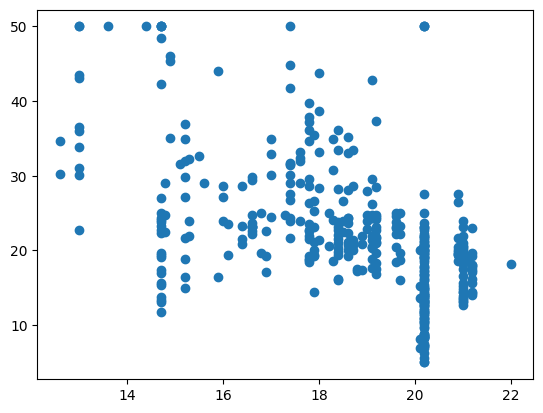

In [ ]:
plt.scatter(df1['PTRATIO'], df1['PRICES'])
plt.show()

In [ ]:
np.corrcoef(df1['PTRATIO'], df1['PRICES'])

array([[ 1.        , -0.54380901],
       [-0.54380901,  1.        ]])

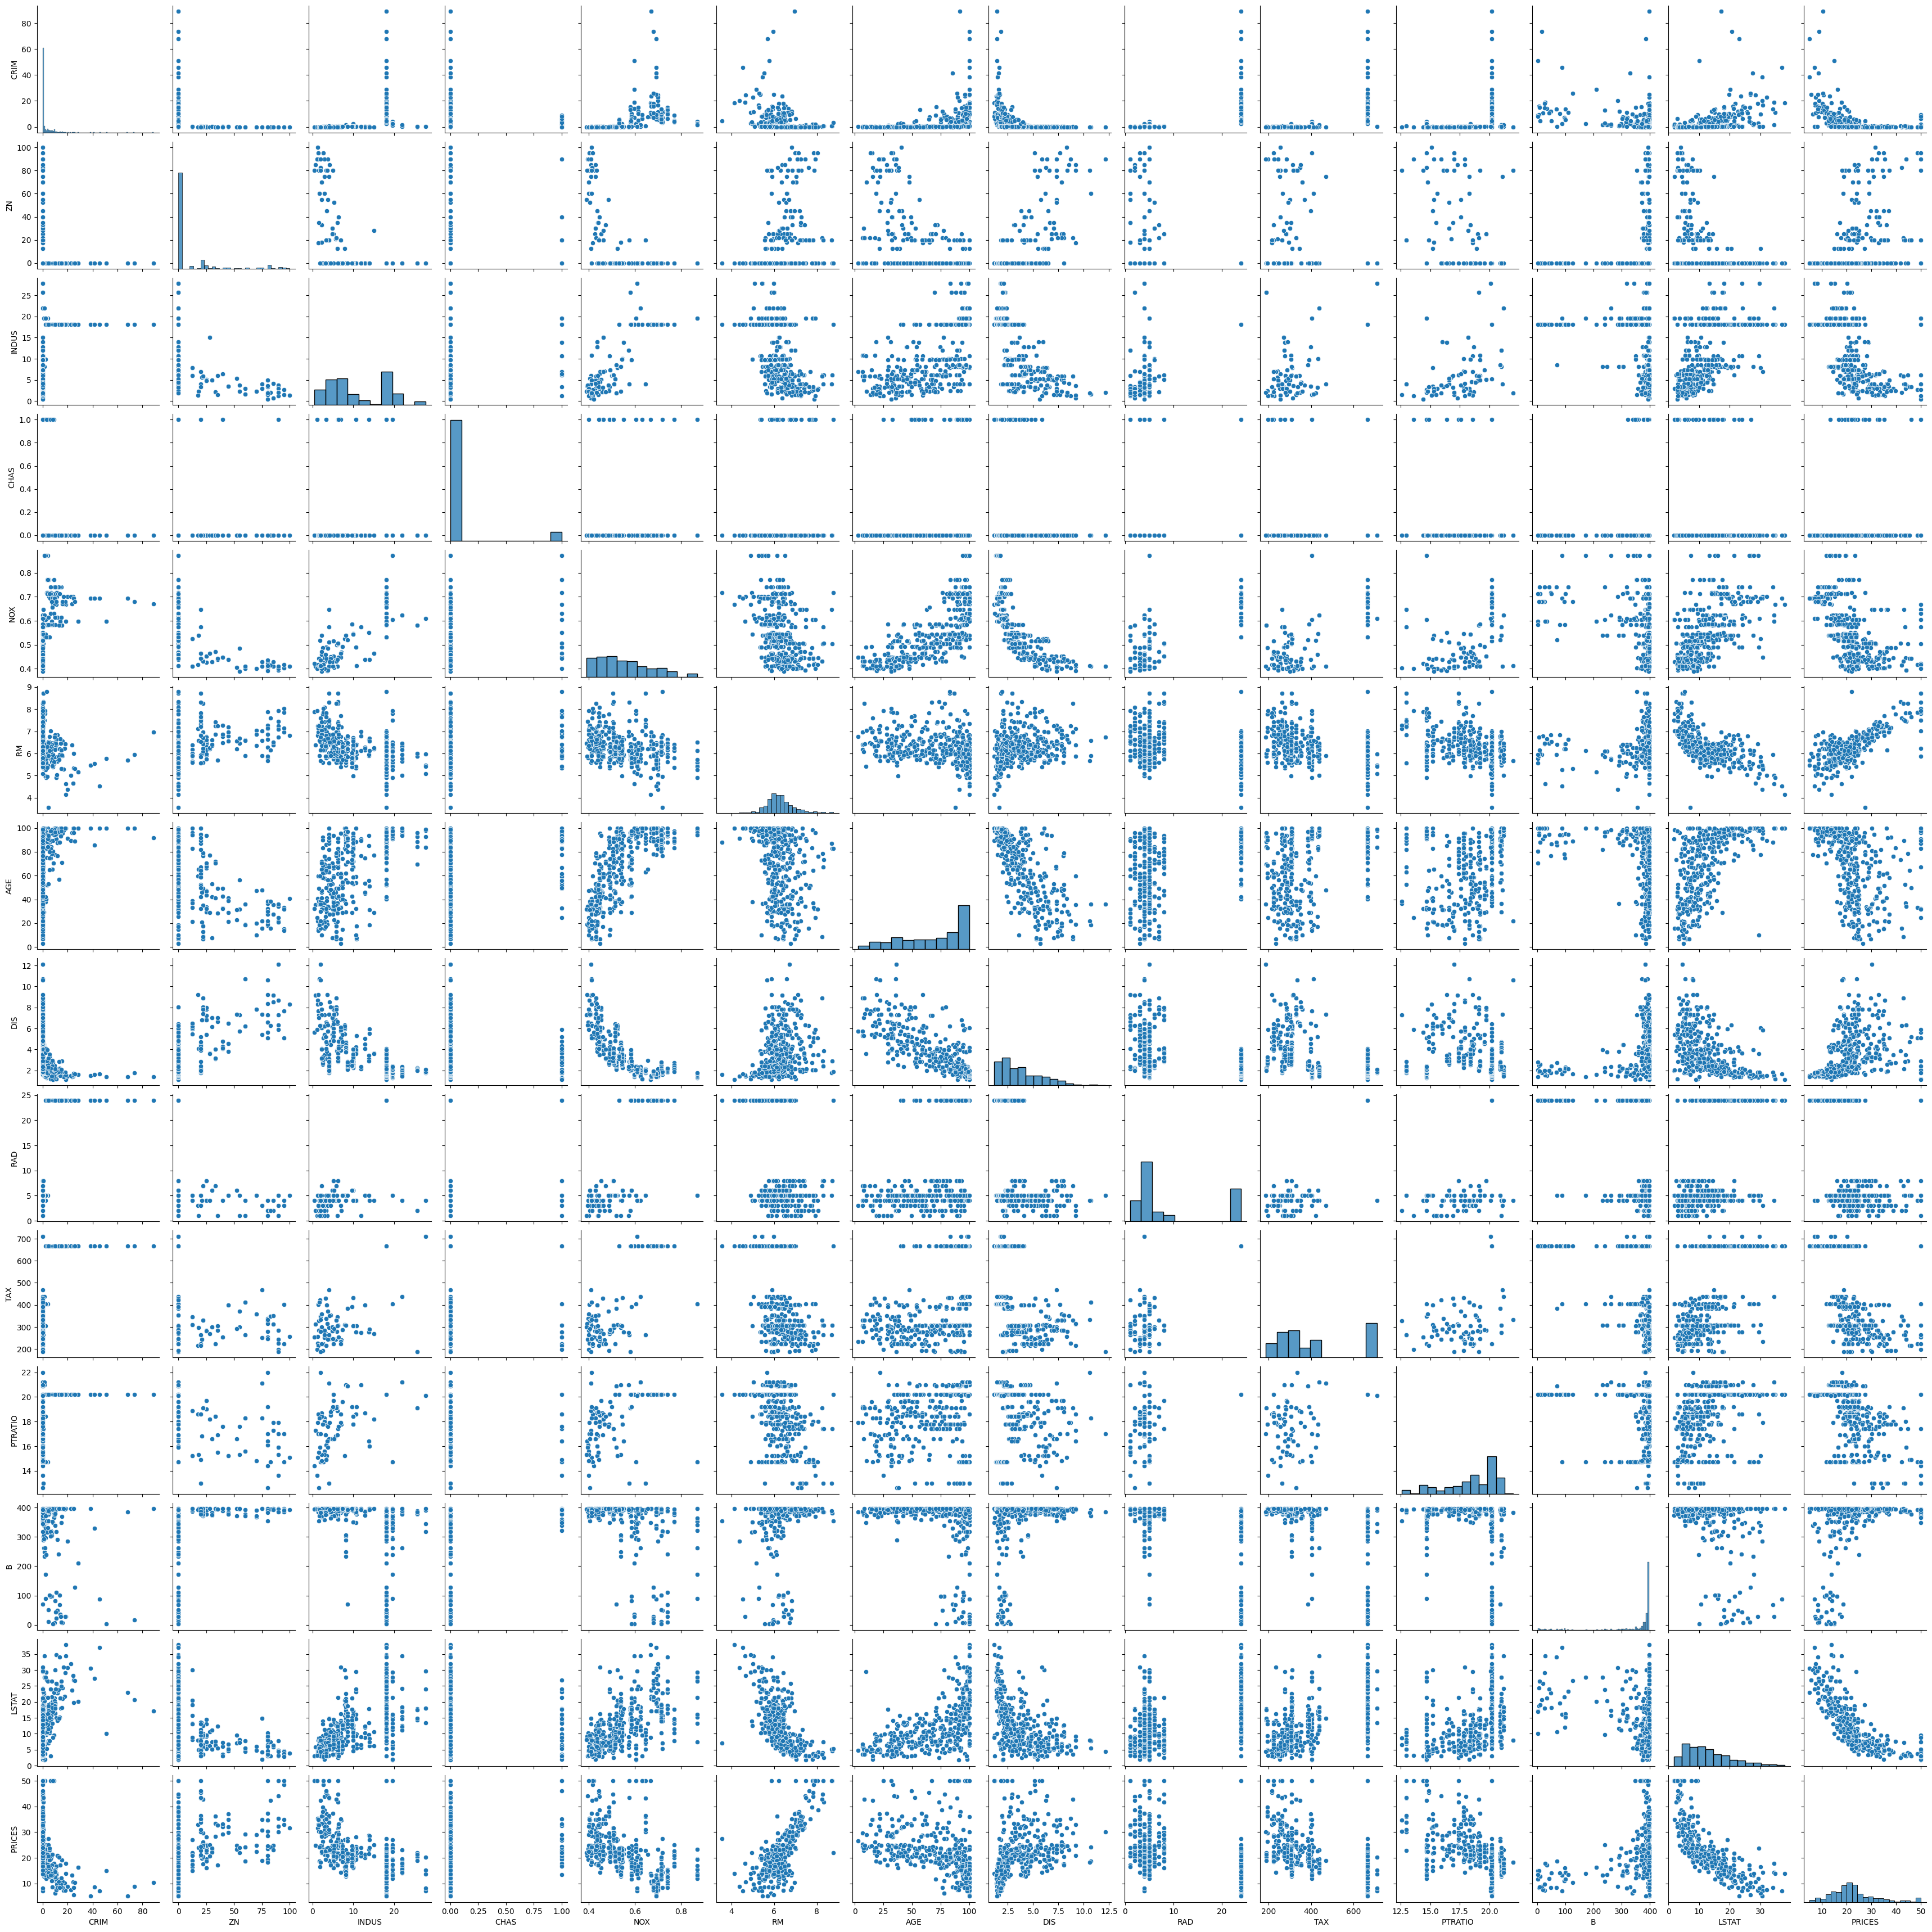

In [ ]:
sns.pairplot(df1)
plt.show()

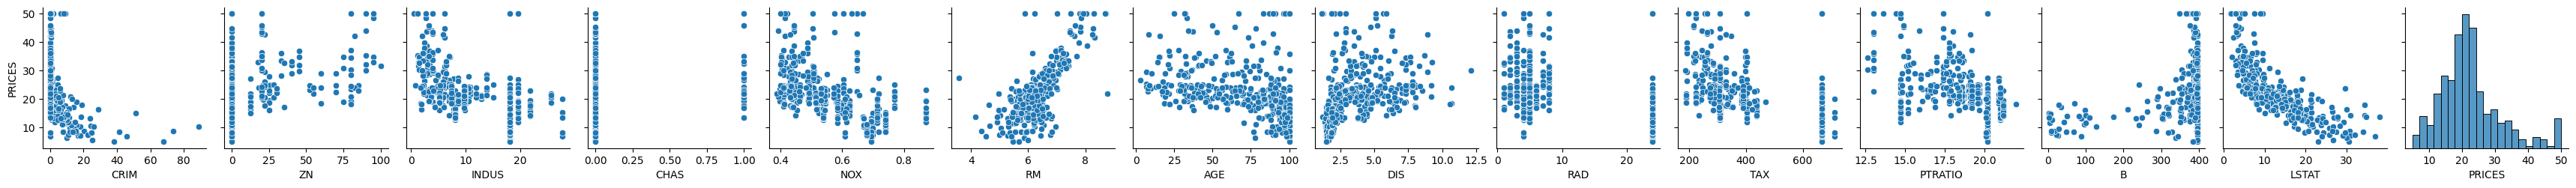

In [ ]:
sns.pairplot(df1, x_vars=df1.columns, y_vars='PRICES')

In [ ]:
df1.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICES'],
      dtype='object')

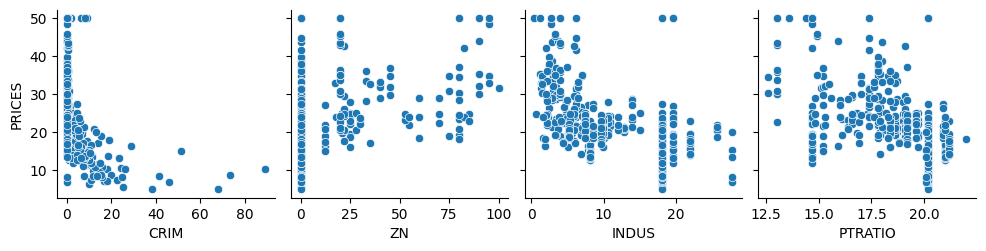

In [ ]:
sns.pairplot(df1, x_vars=['CRIM', 'ZN', 'INDUS', 'PTRATIO'], y_vars='PRICES')

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop(['PRICES'], axis=1), df1['PRICES'], test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
modelo1 = DecisionTreeRegressor(max_depth=30)
modelo1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=30)

In [ ]:
predic_test=modelo1.predict(X_test)

In [ ]:
X_test[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
127,0.25915,0.0,21.89,0.0,0.624,5.693,96.0,1.7883,4,437,21.2,392.11,17.19
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5,226,17.9,395.93,4.81
30,1.13081,0.0,8.14,0.0,0.538,5.713,94.1,4.2330,4,307,21.0,360.17,22.60
399,9.91655,0.0,18.10,0.0,0.693,5.852,77.8,1.5004,24,666,20.2,338.16,29.97
178,0.06642,0.0,4.05,0.0,0.510,6.860,74.4,2.9153,5,296,16.6,391.27,6.92


In [ ]:
predic_test[:5]

array([16.958     , 34.65384615, 16.958     , 11.43673469, 22.63452381])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predic_test)

21.75974683544304

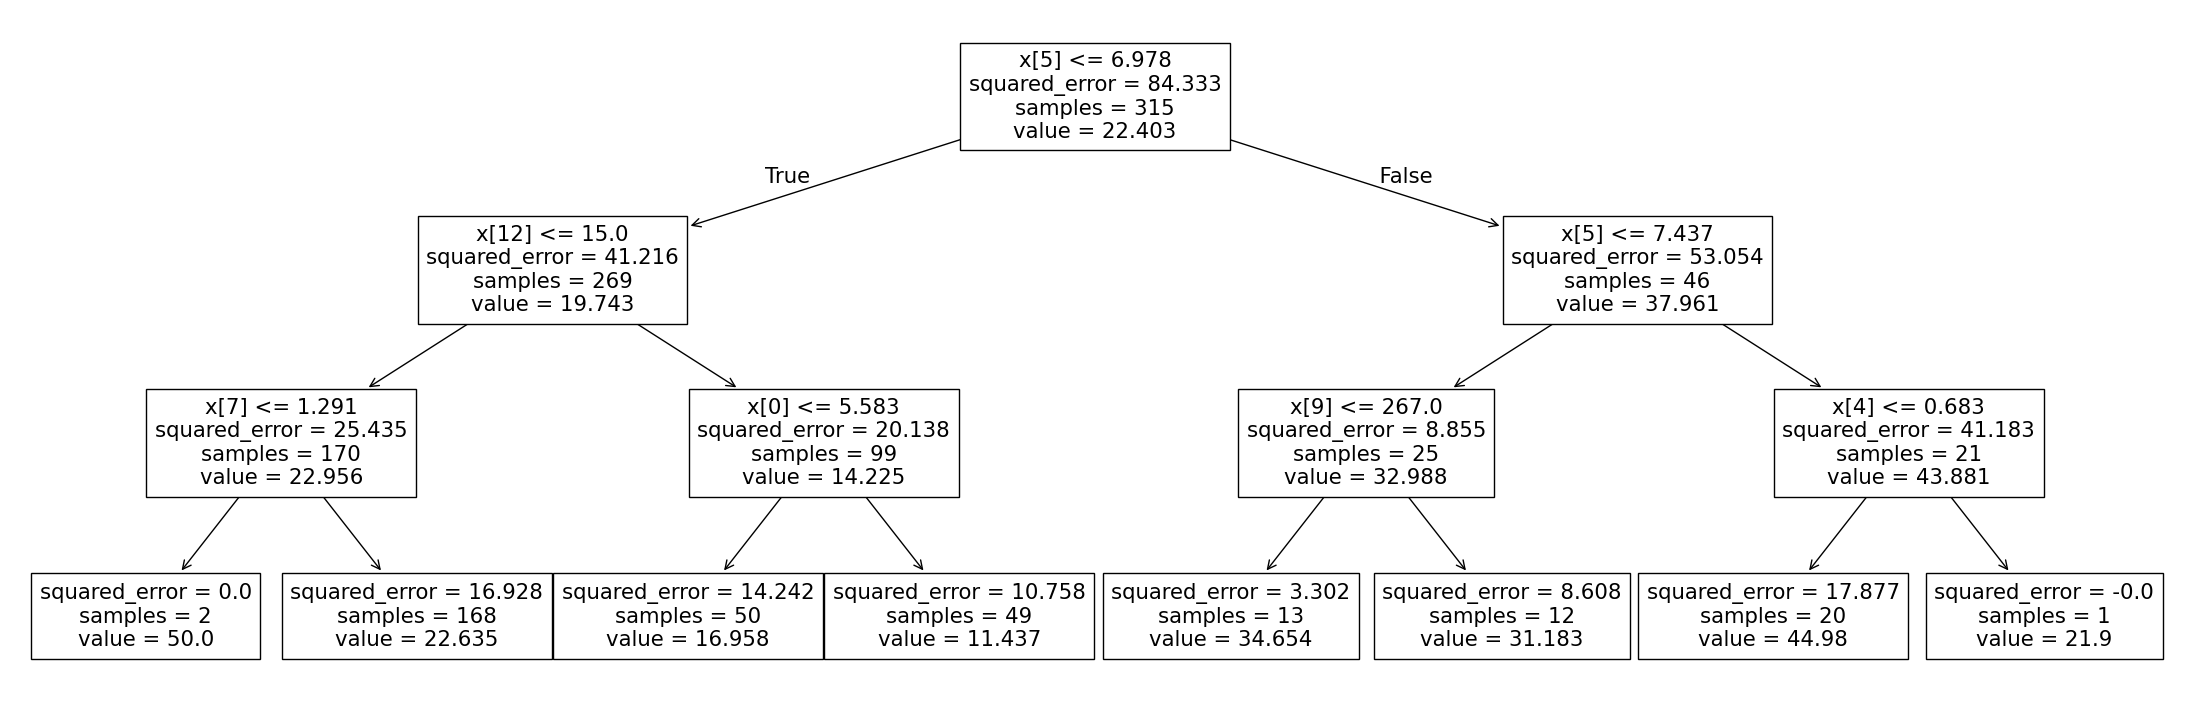

In [ ]:
from sklearn.tree import plot_tree
fig=plt.figure(figsize=(28, 9))
diagrama=plot_tree(modelo1)

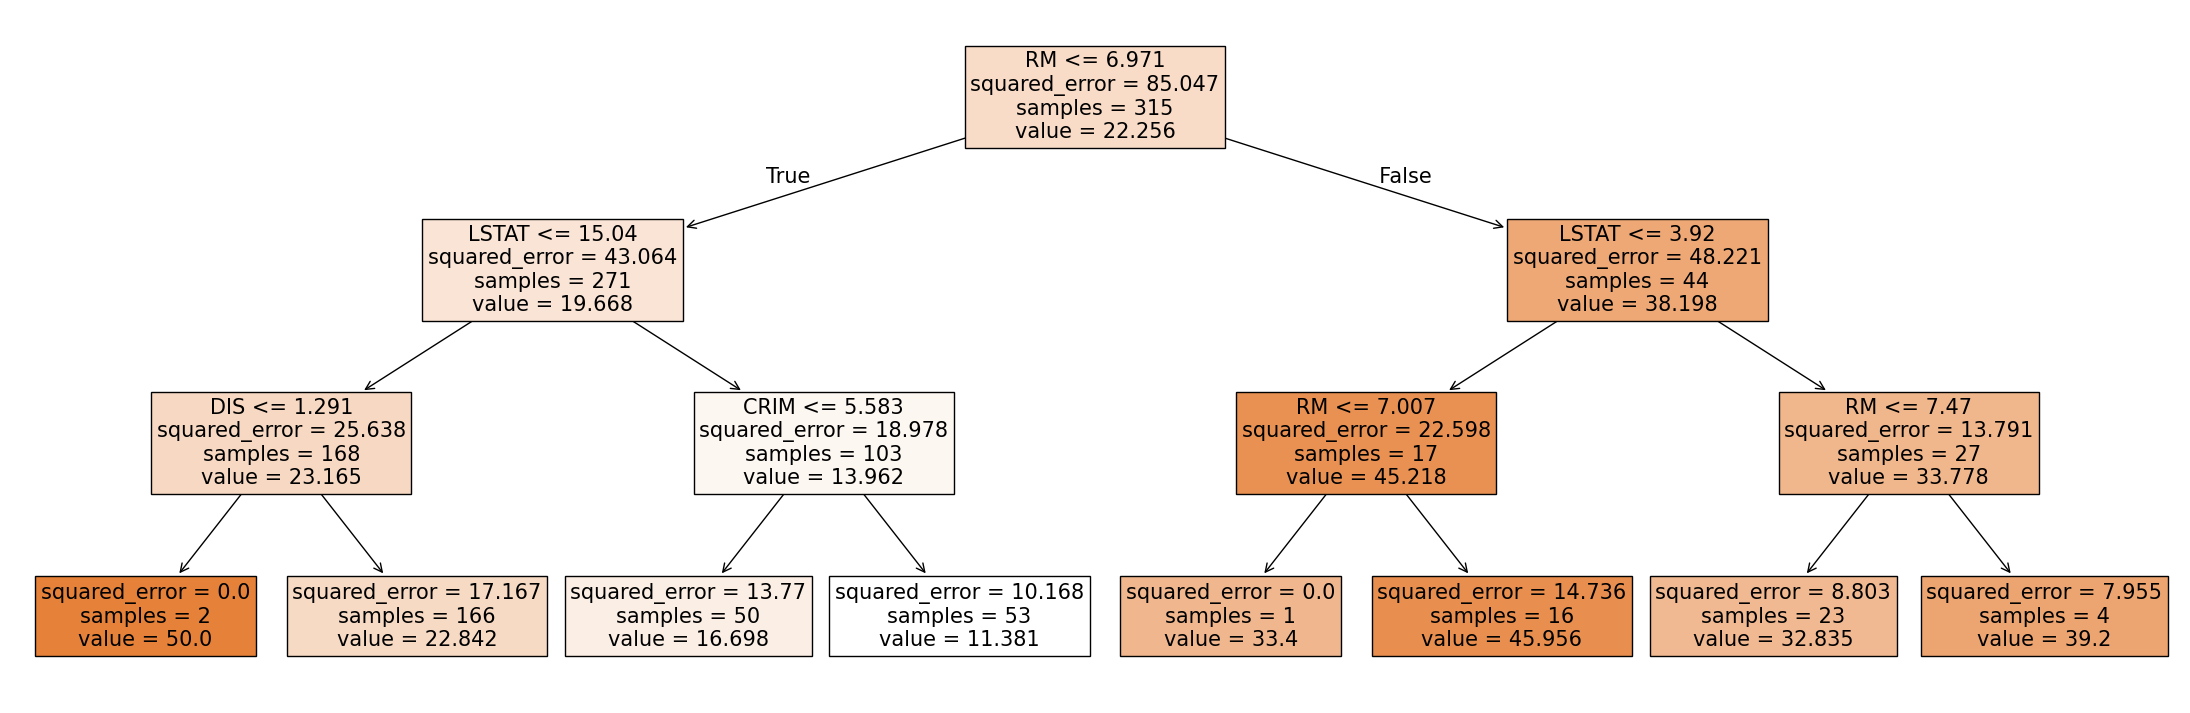

In [ ]:
from sklearn.tree import plot_tree
fig=plt.figure(figsize=(28, 9))
diagrama=plot_tree(decision_tree=modelo1,
                   feature_names=X_train.columns,
                   filled=True,
                   fontsize=15,
                   impurity=True)

Best parameters for RandomForestRegressor: {'max_depth': 14}
Best Mean Squared Error (from cross-validation) for RandomForestRegressor: 10.550802317680267
Mean Squared Error on Test Set (with best RandomForestRegressor model): 12.295971954222018

Grid Search Results for RandomForestRegressor:


,param_max_depth,mean_test_score
0,1,34.773379
1,2,19.637827
2,3,13.891864
3,4,12.297676
4,5,11.408397
5,6,10.998908
6,7,10.848168
7,8,10.746793
8,9,10.665029
9,10,10.727779


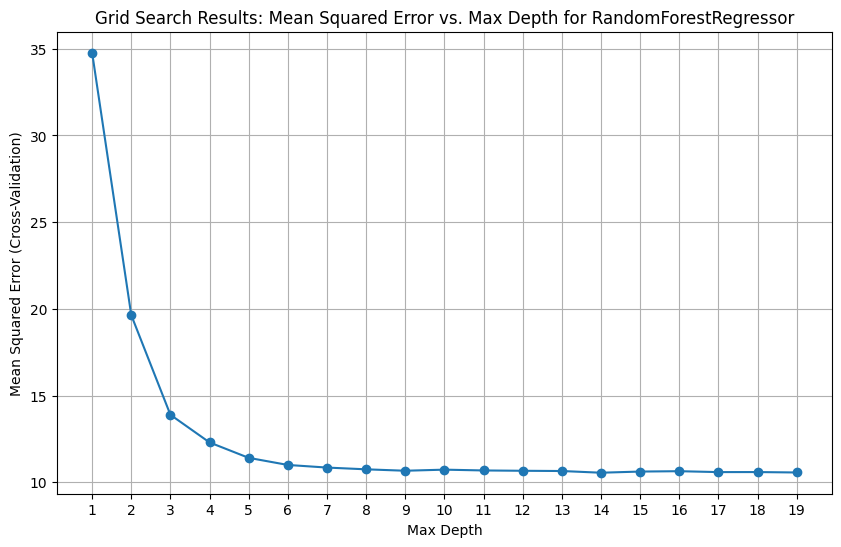

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

# Define the parameter grid to search for RandomForestRegressor
param_grid_rf = {'max_depth': range(1, 20)} # Exploring depths from 1 to 10

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=1)

# Create GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
                           scoring='neg_mean_squared_error', cv=5) # Using negative MSE for scoring

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_rf = grid_search_rf.best_params_
best_mse_rf = -grid_search_rf.best_score_ # Convert negative MSE back to positive

print(f"Best parameters for RandomForestRegressor: {best_params_rf}")
print(f"Best Mean Squared Error (from cross-validation) for RandomForestRegressor: {best_mse_rf}")

# You can also get the best estimator directly
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the best model on the test set
test_predictions_rf = best_rf_model.predict(X_test)
test_mse_rf = mean_squared_error(y_test, test_predictions_rf)
print(f"Mean Squared Error on Test Set (with best RandomForestRegressor model): {test_mse_rf}")

# Get the results from the grid search for visualization
results_rf = grid_search_rf.cv_results_

# Create a DataFrame for better visualization of results
results_df_rf = pd.DataFrame({
    'param_max_depth': results_rf['param_max_depth'],
    'mean_test_score': -results_rf['mean_test_score'] # Convert negative MSE back to positive
})

# Display the table
print("\nGrid Search Results for RandomForestRegressor:")
display(results_df_rf)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(results_df_rf['param_max_depth'], results_df_rf['mean_test_score'], marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error (Cross-Validation)')
plt.title('Grid Search Results: Mean Squared Error vs. Max Depth for RandomForestRegressor')
plt.xticks(results_df_rf['param_max_depth'])
plt.grid(True)
plt.show()

In [ ]:
# Define the parameter grid to search for RandomForestRegressor
param_grid_rf_2_params = {
    'max_depth': range(4, 17),       # Exploring depths from 1 to 10
    'n_estimators': [50, 100, 150, 200] # Exploring different numbers of estimators
}

print("Parameter grid defined:")
print(param_grid_rf_2_params)

Parameter grid defined:
{'max_depth': range(4, 17), 'n_estimators': [50, 100, 150, 200]}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=1) # You can set random_state for reproducibility

# Create GridSearchCV object
grid_search_rf_2_params = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf_2_params,
                                      scoring='neg_mean_squared_error', cv=5) # Using negative MSE for scoring

# Fit the grid search to the data
grid_search_rf_2_params.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_rf_2_params = grid_search_rf_2_params.best_params_
best_mse_rf_2_params = -grid_search_rf_2_params.best_score_ # Convert negative MSE back to positive

print(f"Best parameters for RandomForestRegressor: {best_params_rf_2_params}")
print(f"Best Mean Squared Error (from cross-validation) for RandomForestRegressor: {best_mse_rf_2_params}")

# Evaluate the best model on the test set
best_rf_model_2_params = grid_search_rf_2_params.best_estimator_
test_predictions_rf_2_params = best_rf_model_2_params.predict(X_test)
test_mse_rf_2_params = mean_squared_error(y_test, test_predictions_rf_2_params)
print(f"Mean Squared Error on Test Set (with best RandomForestRegressor model): {test_mse_rf_2_params}")

Best parameters for RandomForestRegressor: {'max_depth': 9, 'n_estimators': 200}
Best Mean Squared Error (from cross-validation) for RandomForestRegressor: 14.912488627218144
Mean Squared Error on Test Set (with best RandomForestRegressor model): 9.010611925364275


In [ ]:
import pandas as pd

# Get the results from the grid search
results_rf_2_params = grid_search_rf_2_params.cv_results_

# Create a DataFrame for better visualization of results
results_df_rf_2_params = pd.DataFrame({
    'param_max_depth': results_rf_2_params['param_max_depth'],
    'param_n_estimators': results_rf_2_params['param_n_estimators'],
    'mean_test_score': -results_rf_2_params['mean_test_score'] # Convert negative MSE back to positive
})

# Pivot the table for a better view of parameter combinations
pivot_table_rf_2_params = results_df_rf_2_params.pivot_table(
    index='param_max_depth',
    columns='param_n_estimators',
    values='mean_test_score'
)

# Display the pivot table
print("\nGrid Search Results (Mean Squared Error) for RandomForestRegressor:")
display(pivot_table_rf_2_params)


Grid Search Results (Mean Squared Error) for RandomForestRegressor:


param_n_estimators,50,100,150,200
param_max_depth,,,,
1,38.375833,38.079019,37.751967,37.908689
2,22.101357,22.012158,21.899525,21.921046
3,18.398147,18.360067,18.286557,18.343915
4,16.581485,16.686823,16.658091,16.703384
5,16.005252,15.892806,15.904323,15.948068
6,15.433185,15.408818,15.380400,15.365426
7,15.223225,15.258777,15.194409,15.149389
8,15.026315,15.083416,15.031264,14.996190
9,15.056823,15.004977,14.960820,14.912489


Feature Importances (RandomForestRegressor):


,0
RM,0.455989
LSTAT,0.361587
CRIM,0.049460
DIS,0.048852
NOX,0.017824
TAX,0.016667
PTRATIO,0.013208
B,0.012486
AGE,0.010787
INDUS,0.007927


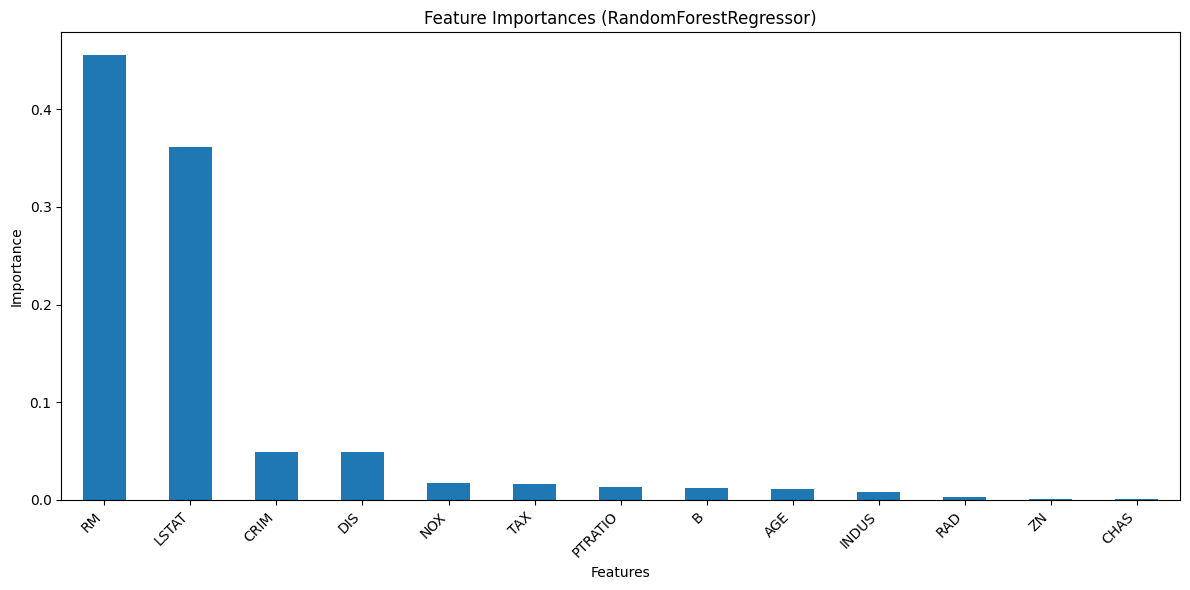

In [ ]:
# Get feature importances from the best RandomForestRegressor model
feature_importances = best_rf_model_2_params.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Create a pandas Series for better visualization
feature_importances_series = pd.Series(feature_importances, index=feature_names)

# Sort the features by importance
sorted_feature_importances = feature_importances_series.sort_values(ascending=False)

# Display the sorted feature importances
print("Feature Importances (RandomForestRegressor):")
display(sorted_feature_importances)

# Optionally, plot the feature importances
plt.figure(figsize=(12, 6))
sorted_feature_importances.plot(kind='bar')
plt.title('Feature Importances (RandomForestRegressor)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **II. Árbol de clasificación**

In [ ]:
import statsmodels.api as sm
datos=sm.datasets.get_rdataset('Carseats', 'ISLR')

In [ ]:
datos.keys()

dict_keys(['data', '__doc__', 'package', 'title', 'from_cache'])

In [ ]:
datos.title

'Sales of Child Car Seats'

In [ ]:
print(datos.__doc__)

.. container::

   ======== ===============
   Carseats R Documentation
   ======== ===============

   .. rubric:: Sales of Child Car Seats
      :name: Carseats

   .. rubric:: Description
      :name: description

   A simulated data set containing sales of child car seats at 400
   different stores.

   .. rubric:: Usage
      :name: usage

   .. code:: R

      Carseats

   .. rubric:: Format
      :name: format

   A data frame with 400 observations on the following 11 variables.

   ``Sales``
      Unit sales (in thousands) at each location

   ``CompPrice``
      Price charged by competitor at each location

   ``Income``
      Community income level (in thousands of dollars)

   ``Advertising``
      Local advertising budget for company at each location (in
      thousands of dollars)

   ``Population``
      Population size in region (in thousands)

   ``Price``
      Price company charges for car seats at each site

   ``ShelveLoc``
      A factor with levels ``Bad``, ``Good

In [ ]:
df=datos.data
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
df['ventas_altas']=np.where(df.Sales>8, 1, 0)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ventas_altas
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0


In [ ]:
df.drop(['Sales'], axis=1, inplace=True)

In [ ]:
dummies=pd.get_dummies(df[['ShelveLoc', 'Urban', 'US']])

In [ ]:
dummies

,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,1
2,0,0,1,0,1,0,1
3,0,0,1,0,1,0,1
4,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...
395,0,1,0,0,1,0,1
396,0,0,1,1,0,0,1
397,0,0,1,0,1,0,1
398,1,0,0,0,1,0,1


In [ ]:
df.drop(['ShelveLoc', 'Urban', 'US'], axis=1, inplace=True)

In [ ]:
df_dummies=pd.concat([df, dummies], axis=1)

In [ ]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CompPrice         400 non-null    int64
 1   Income            400 non-null    int64
 2   Advertising       400 non-null    int64
 3   Population        400 non-null    int64
 4   Price             400 non-null    int64
 5   Age               400 non-null    int64
 6   Education         400 non-null    int64
 7   ventas_altas      400 non-null    int32
 8   ShelveLoc_Bad     400 non-null    uint8
 9   ShelveLoc_Good    400 non-null    uint8
 10  ShelveLoc_Medium  400 non-null    uint8
 11  Urban_No          400 non-null    uint8
 12  Urban_Yes         400 non-null    uint8
 13  US_No             400 non-null    uint8
 14  US_Yes            400 non-null    uint8
dtypes: int32(1), int64(7), uint8(7)
memory usage: 26.3 KB


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies.drop(columns=['ventas_altas']), df['ventas_altas'])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelo2=DecisionTreeClassifier(max_depth=4, criterion='gini')

In [ ]:
modelo2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
predicciones2=modelo2.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicciones2)

0.76

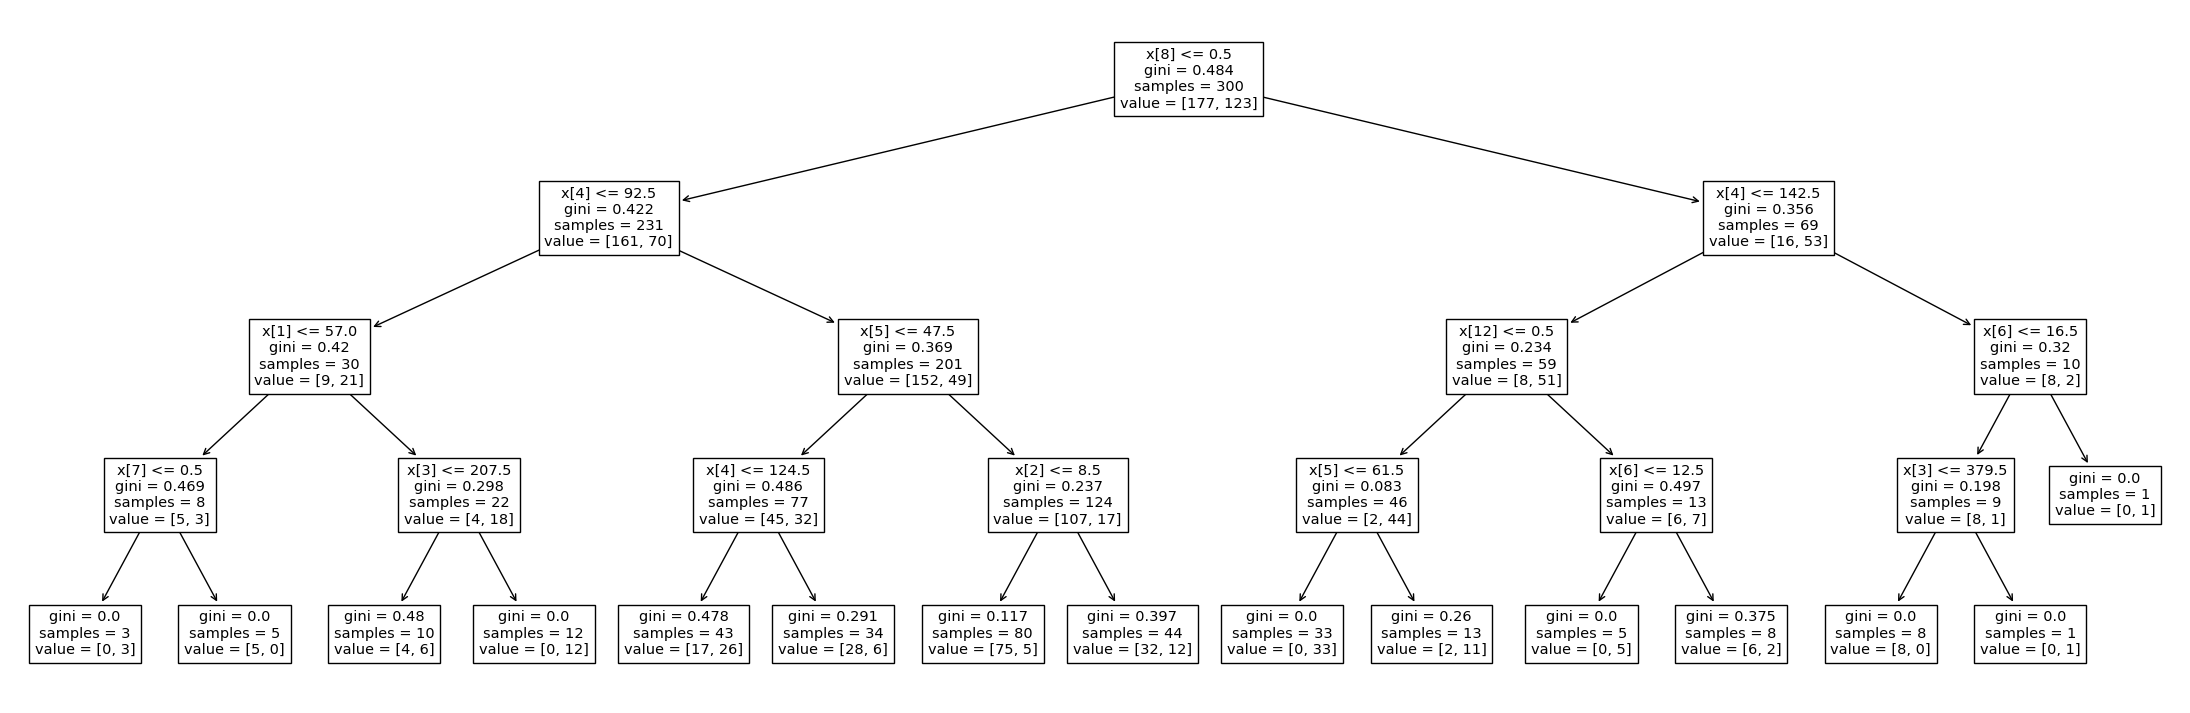

In [ ]:
from sklearn.tree import plot_tree
fig=plt.figure(figsize=(28, 9))
diagrama=plot_tree(modelo2)

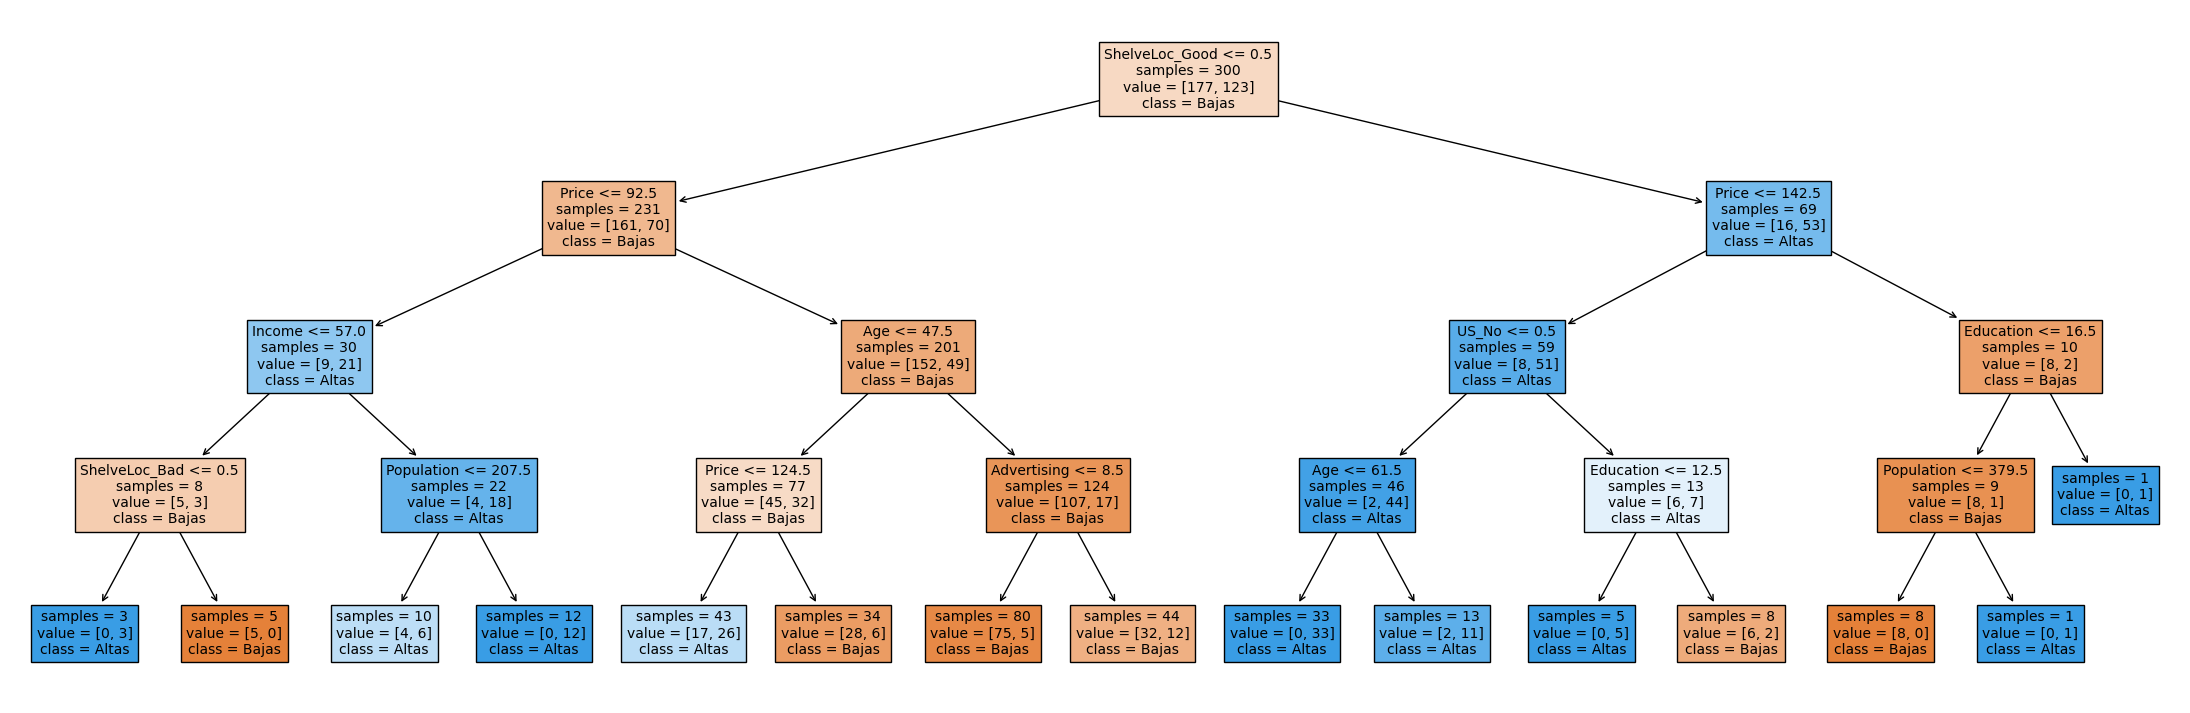

In [ ]:
from sklearn.tree import plot_tree
fig=plt.figure(figsize=(28, 9))
diagrama=plot_tree(decision_tree=modelo2,
                   feature_names=X_train.columns,
                   class_names=['Bajas', 'Altas'],
                   filled=True,
                   fontsize=10,
                   impurity=False)

## **III. Random Forest**

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
modelo3 = RandomForestRegressor(
            n_estimators = 20,
            criterion    = 'squared_error',
            max_depth    = 14,
         )

In [11]:
modelo3.fit(X_train, y_train)

RandomForestRegressor(max_depth=14, n_estimators=20)

In [12]:
predicciones=modelo3.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predicciones)

7.943727275601926

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definimos el modelo base
rf = RandomForestRegressor(random_state=42)

In [16]:
# Definimos la grilla de parámetros a probar
param_grid = {
    'n_estimators': [10, 20, 100],
    'max_depth': [10, 14, 18, None],
    'criterion': ['squared_error', 'absolute_error'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [17]:
# Configuramos el GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,             # validación cruzada
    n_jobs=-1,        # usar todos los núcleos disponibles
    scoring='neg_mean_squared_error',
    verbose=2
)

# Ajustamos con los datos de entrenamiento
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [10, 14, 18, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [18]:
# Mostramos los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'criterion': 'squared_error', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [20]:
# Entrenamos un nuevo modelo con los parámetros óptimos
modelo_optimo = RandomForestRegressor(
    **grid_search.best_params_,
    random_state=42
)
modelo_optimo.fit(X_train, y_train)

RandomForestRegressor(max_depth=18, random_state=42)

In [21]:
predicciones=modelo_optimo.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predicciones)

6.847783015479435